In [27]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [28]:
(x_traif_, y_train_), (x_test_, y_test_) = tf.keras.datasets.mnist.load_data()

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [51]:
model4 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [52]:
batch_size = 128
epochs = 15

model4.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model4.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 110s 2ms/sample - loss: 0.3580 - accuracy: 0.8923 - val_loss: 0.0838 - val_accuracy: 0.9780
Epoch 2/15
54000/54000 [==============================] - 113s 2ms/sample - loss: 0.1132 - accuracy: 0.9656 - val_loss: 0.0572 - val_accuracy: 0.9835
Epoch 3/15
54000/54000 [==============================] - 112s 2ms/sample - loss: 0.0831 - accuracy: 0.9746 - val_loss: 0.0472 - val_accuracy: 0.9875
Epoch 4/15
54000/54000 [==============================] - 110s 2ms/sample - loss: 0.0706 - accuracy: 0.9781 - val_loss: 0.0427 - val_accuracy: 0.9888
Epoch 5/15
54000/54000 [==============================] - 109s 2ms/sample - loss: 0.0629 - accuracy: 0.9802 - val_loss: 0.0415 - val_accuracy: 0.9890
Epoch 6/15
54000/54000 [==============================] - 114s 2ms/sample - loss: 0.0549 - accuracy: 0.9825 - val_loss: 0.0364 - val_accuracy: 0.9895
Epoch 7/15
54000/54000 [===========================

In [53]:
score = model4.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.024060704278972115
Test accuracy: 0.991


In [58]:
predict_test = model4.predict_classes(x_test, verbose=1)

10000/10000 [==============================] - 11s 1ms/sample


In [59]:
cm = confusion_matrix(y_test_, predict_test)

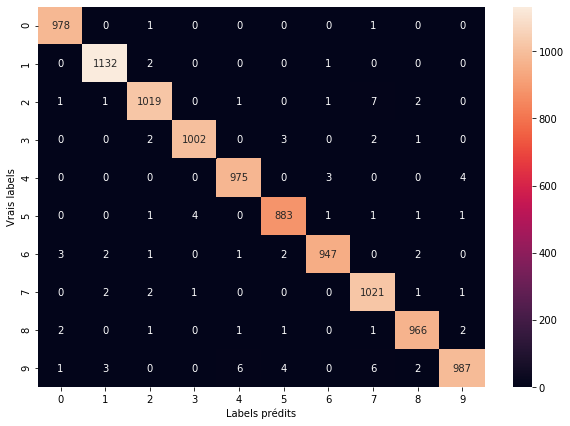

In [64]:
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
df_cm = pd.DataFrame(cm, index =[i for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
                  columns = [i for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
plt.figure(figsize = (10,7))
ax = sns.heatmap(df_cm,annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_ylabel("Vrais labels")
ax.set_xlabel("Labels prédits")
plt.show()

In [65]:
model4.save('model_conv.h5') 

In [15]:
from keras_visualizer import visualizer 



In [14]:
!pip3 install keras-visualizer

You should consider upgrading via the 'c:\users\lenovo\anaconda3\python.exe -m pip install --upgrade pip' command.


In [16]:
visualizer(model, format='png', view=True)

# Model 2

In [17]:
model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [18]:
batch_size = 128
epochs = 15

model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 64s 1ms/sample - loss: 0.4102 - accuracy: 0.8849 - val_loss: 0.1492 - val_accuracy: 0.9610
Epoch 2/15
54000/54000 [==============================] - 61s 1ms/sample - loss: 0.1732 - accuracy: 0.9492 - val_loss: 0.1011 - val_accuracy: 0.9742
Epoch 3/15
54000/54000 [==============================] - 61s 1ms/sample - loss: 0.1336 - accuracy: 0.9603 - val_loss: 0.0863 - val_accuracy: 0.9778
Epoch 4/15
54000/54000 [==============================] - 61s 1ms/sample - loss: 0.1170 - accuracy: 0.9646 - val_loss: 0.0744 - val_accuracy: 0.9805
Epoch 5/15
54000/54000 [==============================] - 61s 1ms/sample - loss: 0.1033 - accuracy: 0.9690 - val_loss: 0.0678 - val_accuracy: 0.9818
Epoch 6/15
54000/54000 [==============================] - 61s 1ms/sample - loss: 0.0963 - accuracy: 0.9714 - val_loss: 0.0645 - val_accuracy: 0.9833
Epoch 7/15
54000/54000 [==============================] -

In [19]:
score = model2.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.04987648413684219
Test accuracy: 0.9841


In [54]:
predict_test = model4.predict_classes(x_test, verbose=1)

10000/10000 [==============================] - 10s 1ms/sample


In [22]:
from sklearn.metrics import confusion_matrix , accuracy_score , f1_score

In [24]:
predict_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [29]:
y_test_

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [56]:
#acc m1
accuracy_score(y_test_,predict_test)

0.991

In [57]:
f1_score(y_test_,predict_test,average=None, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([0.99541985, 0.99516484, 0.98884037, 0.99355478, 0.99186165,
       0.98935574, 0.99110413, 0.98790518, 0.99127758, 0.98502994])

In [40]:
import numpy as np


In [44]:
cm = confusion_matrix(y_test_, predict_test)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_norm.diagonal()

array([0.99795918, 0.99647577, 0.99224806, 0.99009901, 0.99592668,
       0.98654709, 0.99060543, 0.97762646, 0.98767967, 0.98909812])

In [46]:
# model simple 
inputs = tf.keras.Input(shape=(28, 28))
x = tf.keras.layers.Flatten()(inputs)
first_layer = tf.keras.layers.Dense(784, activation = 'sigmoid')(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(first_layer)
model3 = tf.keras.Model(inputs, outputs)
model3.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [48]:
batch_size = 500
epochs = 5

model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 47s 879us/sample - loss: 0.0562 - accuracy: 0.9824 - val_loss: 0.0492 - val_accuracy: 0.9873
Epoch 2/5
54000/54000 [==============================] - 48s 882us/sample - loss: 0.0522 - accuracy: 0.9836 - val_loss: 0.0510 - val_accuracy: 0.9870
Epoch 3/5
54000/54000 [==============================] - 47s 877us/sample - loss: 0.0515 - accuracy: 0.9835 - val_loss: 0.0499 - val_accuracy: 0.9873
Epoch 4/5
54000/54000 [==============================] - 47s 878us/sample - loss: 0.0512 - accuracy: 0.9844 - val_loss: 0.0502 - val_accuracy: 0.9863
Epoch 5/5
54000/54000 [==============================] - 48s 888us/sample - loss: 0.0494 - accuracy: 0.9848 - val_loss: 0.0488 - val_accuracy: 0.9880


In [50]:
score3 = model2.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score3[0])
print("Test accuracy:", score3[1])

Test loss: 0.04657399578453041
Test accuracy: 0.9845
